In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import anndata as an
import scanpy as sc

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Read datafiles

In [2]:
#Set path
os.chdir('/Users/jaeyonglee/Library/CloudStorage/OneDrive-HarvardUniversity/Graphene_Electrophysiology_Recording/SourceData/')
data_path = './Figure5/'

sc_ad_recorded_ephy_cell_comp = sc.read_h5ad(data_path + 'ad_combined_dataset.h5ad')

# Jointly defined cell niche

/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/graphene_electro_seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


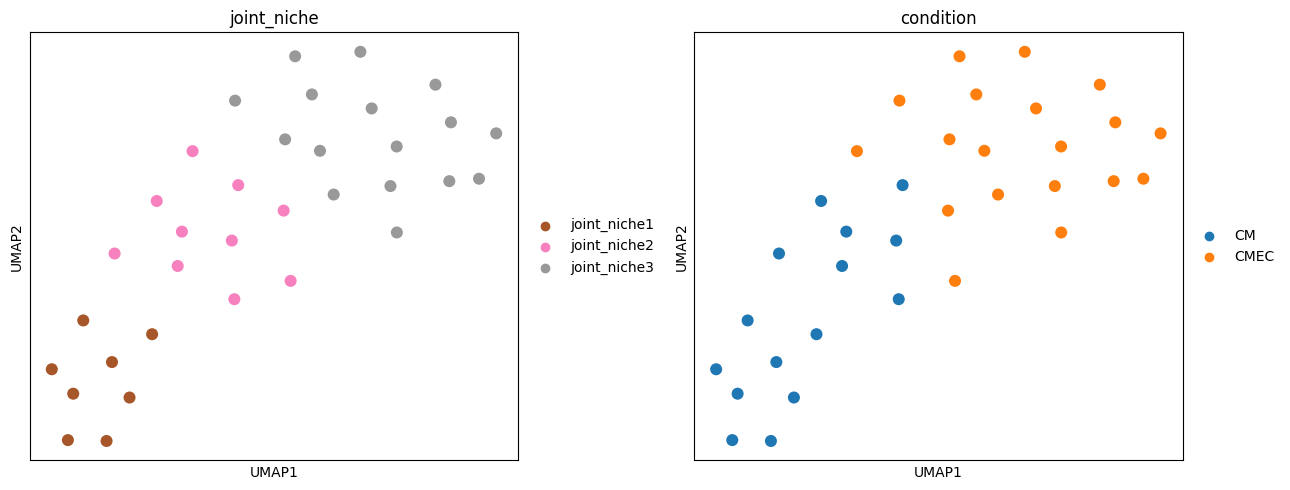

In [3]:
cmap = plt.get_cmap("Set1")
custom_palette = [cmap(i) for i in range(6, 9)]  

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))  # Adjusted figsize for two plots

axs1 = sc.pl.umap(sc_ad_recorded_ephy_cell_comp, color=['joint_niche'],palette = custom_palette, size=300, ax=ax[0], show=False) 
axs2 = sc.pl.umap(sc_ad_recorded_ephy_cell_comp, color=['condition'], size=300, ax=ax[1], show=False) 

plt.tight_layout()
plt.show()

# Back map spatial information

In [4]:
sc_ad_recorded_ephy_cell_comp_W11D1 = sc_ad_recorded_ephy_cell_comp[sc_ad_recorded_ephy_cell_comp.obs['sample']=='W11D1']

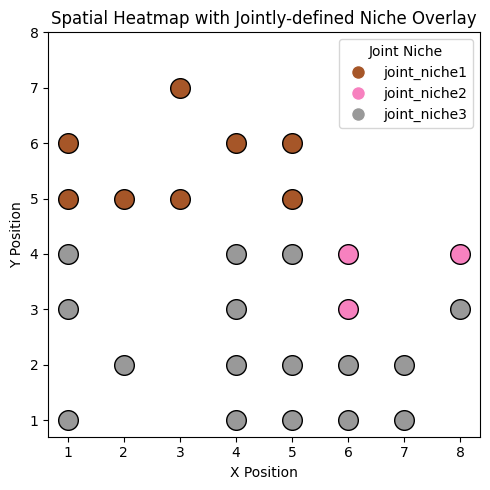

In [5]:
# Extract relevant data
channels = sc_ad_recorded_ephy_cell_comp_W11D1.obs['channels']
joint_niche = sc_ad_recorded_ephy_cell_comp_W11D1.obs['joint_niche']


# Define unique colors for each joint_niche
unique_joint_niches = np.unique(joint_niche)

cmap = plt.get_cmap("Set1")
niche_to_color = {'joint_niche1': cmap(6), 'joint_niche2': cmap(7), 'joint_niche3': cmap(8)}

# Define channel to grid mapping
channel_to_grid = {
    'ch0': (2, 0), 'ch1': (1, 0), 'ch2': (0, 0), 'ch3': (3, 0),
    'ch4': (0, 1), 'ch5': (1, 1), 'ch6': (2, 1), 'ch7': (3, 1),
    'ch8': (0, 2), 'ch9': (1, 2), 'ch10': (2, 2), 'ch11': (3, 2),
    'ch12': (0, 3), 'ch13': (1, 3), 'ch14': (2, 3), 'ch15': (3, 3),
    'ch16': (0, 4), 'ch17': (1, 4), 'ch18': (2, 4), 'ch19': (3, 4),
    'ch20': (0, 5), 'ch21': (1, 5), 'ch22': (2, 5), 'ch23': (3, 5),
    'ch24': (0, 6), 'ch25': (1, 6), 'ch26': (2, 6), 'ch27': (3, 6),
    'ch28': (0, 7), 'ch29': (1, 7), 'ch30': (2, 7), 'ch31': (3, 7),
    'ch32': (4, 7), 'ch33': (5, 7), 'ch34': (6, 7), 'ch35': (7, 7),
    'ch36': (4, 6), 'ch37': (5, 6), 'ch38': (6, 6), 'ch39': (7, 6),
    'ch40': (4, 5), 'ch41': (5, 5), 'ch42': (6, 5), 'ch43': (7, 5),
    'ch44': (4, 4), 'ch45': (5, 4), 'ch46': (6, 4), 'ch47': (7, 4),
    'ch48': (4, 3), 'ch49': (5, 3), 'ch50': (6, 3), 'ch51': (7, 3),
    'ch52': (4, 2), 'ch53': (5, 2), 'ch54': (6, 2), 'ch55': (7, 2),
    'ch56': (4, 1), 'ch57': (5, 1), 'ch58': (6, 1), 'ch59': (7, 1),
    'ch60': (4, 0), 'ch61': (7, 0), 'ch62': (6, 0), 'ch63': (5, 0)
}

# Create data grid for heatmap
heatmap = np.zeros((8, 8))  # Assuming 8x8 grid
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        heatmap[grid_pos] += 1  # Increment count for heatmap

# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 5))

# Overlay dots
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        niche = joint_niche[i]
        color = niche_to_color[niche]
        ax.scatter(grid_pos[1], grid_pos[0], color=color, s=200, edgecolor='black', zorder=2)

# Add grid lines and labels
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(range(1, 9))
ax.set_yticklabels(range(1, 9))
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Spatial Heatmap with Jointly-defined Niche Overlay')

# Create legend for dots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=niche_to_color[niche], markersize=10, label=niche)
           for niche in unique_joint_niches]
ax.legend(handles=handles, title='Joint Niche', loc='upper right')

plt.tight_layout()
plt.show()

## Back map using ephy pseudotime

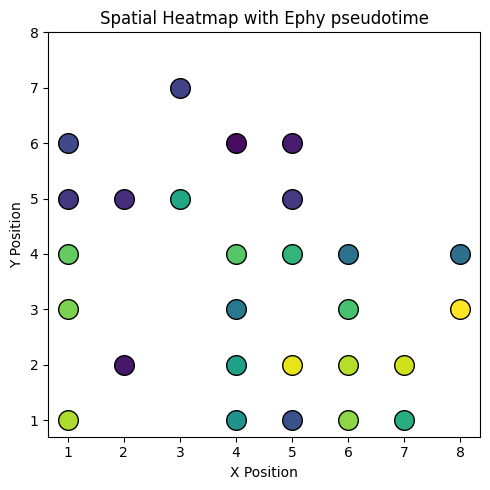

In [6]:
# Extract relevant data
channels = sc_ad_recorded_ephy_cell_comp_W11D1.obs['channels']
ephy_pseudotime = sc_ad_recorded_ephy_cell_comp_W11D1.obs['ephy_pseudotime_normalized']

# Create colormap
cmap = plt.get_cmap('viridis')

# Define channel to grid mapping
channel_to_grid = {
    'ch0': (2, 0), 'ch1': (1, 0), 'ch2': (0, 0), 'ch3': (3, 0),
    'ch4': (0, 1), 'ch5': (1, 1), 'ch6': (2, 1), 'ch7': (3, 1),
    'ch8': (0, 2), 'ch9': (1, 2), 'ch10': (2, 2), 'ch11': (3, 2),
    'ch12': (0, 3), 'ch13': (1, 3), 'ch14': (2, 3), 'ch15': (3, 3),
    'ch16': (0, 4), 'ch17': (1, 4), 'ch18': (2, 4), 'ch19': (3, 4),
    'ch20': (0, 5), 'ch21': (1, 5), 'ch22': (2, 5), 'ch23': (3, 5),
    'ch24': (0, 6), 'ch25': (1, 6), 'ch26': (2, 6), 'ch27': (3, 6),
    'ch28': (0, 7), 'ch29': (1, 7), 'ch30': (2, 7), 'ch31': (3, 7),
    'ch32': (4, 7), 'ch33': (5, 7), 'ch34': (6, 7), 'ch35': (7, 7),
    'ch36': (4, 6), 'ch37': (5, 6), 'ch38': (6, 6), 'ch39': (7, 6),
    'ch40': (4, 5), 'ch41': (5, 5), 'ch42': (6, 5), 'ch43': (7, 5),
    'ch44': (4, 4), 'ch45': (5, 4), 'ch46': (6, 4), 'ch47': (7, 4),
    'ch48': (4, 3), 'ch49': (5, 3), 'ch50': (6, 3), 'ch51': (7, 3),
    'ch52': (4, 2), 'ch53': (5, 2), 'ch54': (6, 2), 'ch55': (7, 2),
    'ch56': (4, 1), 'ch57': (5, 1), 'ch58': (6, 1), 'ch59': (7, 1),
    'ch60': (4, 0), 'ch61': (7, 0), 'ch62': (6, 0), 'ch63': (5, 0)
}


# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 5))

# Overlay dots
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        niche = joint_niche[i]
        color = cmap(ephy_pseudotime.iloc[i])
        ax.scatter(grid_pos[1], grid_pos[0], color=color, s=200, edgecolor='black', zorder=2)

# Adjust layout
plt.tight_layout()

# Add grid lines and labels
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(range(1, 9))
ax.set_yticklabels(range(1, 9))
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Spatial Heatmap with Ephy pseudotime')

plt.tight_layout()
plt.show()

## Spatial map with cell types

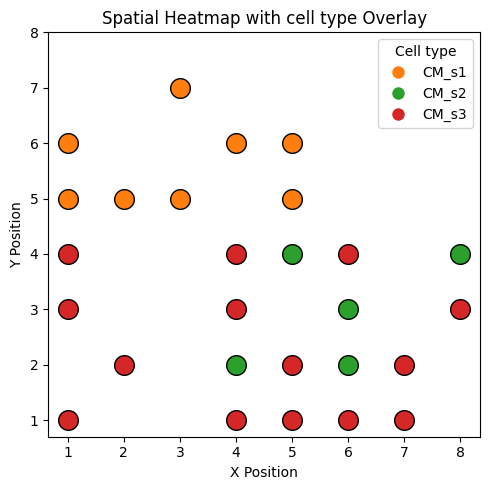

In [7]:
# Extract relevant data
channels = sc_ad_recorded_ephy_cell_comp_W11D1.obs['channels']
cell_type = sc_ad_recorded_ephy_cell_comp_W11D1.obs['cell_type']

# Define unique colors for each joint_niche
palette = {'CM_s1': '#ff7f0e', 'CM_s2': '#2ca02c', 'CM_s3': '#d62728'}

unique_cell_type = np.unique(cell_type)

# Define channel to grid mapping
channel_to_grid = {
    'ch0': (2, 0), 'ch1': (1, 0), 'ch2': (0, 0), 'ch3': (3, 0),
    'ch4': (0, 1), 'ch5': (1, 1), 'ch6': (2, 1), 'ch7': (3, 1),
    'ch8': (0, 2), 'ch9': (1, 2), 'ch10': (2, 2), 'ch11': (3, 2),
    'ch12': (0, 3), 'ch13': (1, 3), 'ch14': (2, 3), 'ch15': (3, 3),
    'ch16': (0, 4), 'ch17': (1, 4), 'ch18': (2, 4), 'ch19': (3, 4),
    'ch20': (0, 5), 'ch21': (1, 5), 'ch22': (2, 5), 'ch23': (3, 5),
    'ch24': (0, 6), 'ch25': (1, 6), 'ch26': (2, 6), 'ch27': (3, 6),
    'ch28': (0, 7), 'ch29': (1, 7), 'ch30': (2, 7), 'ch31': (3, 7),
    'ch32': (4, 7), 'ch33': (5, 7), 'ch34': (6, 7), 'ch35': (7, 7),
    'ch36': (4, 6), 'ch37': (5, 6), 'ch38': (6, 6), 'ch39': (7, 6),
    'ch40': (4, 5), 'ch41': (5, 5), 'ch42': (6, 5), 'ch43': (7, 5),
    'ch44': (4, 4), 'ch45': (5, 4), 'ch46': (6, 4), 'ch47': (7, 4),
    'ch48': (4, 3), 'ch49': (5, 3), 'ch50': (6, 3), 'ch51': (7, 3),
    'ch52': (4, 2), 'ch53': (5, 2), 'ch54': (6, 2), 'ch55': (7, 2),
    'ch56': (4, 1), 'ch57': (5, 1), 'ch58': (6, 1), 'ch59': (7, 1),
    'ch60': (4, 0), 'ch61': (7, 0), 'ch62': (6, 0), 'ch63': (5, 0)
}

# Create data grid for heatmap
heatmap = np.zeros((8, 8))  # Assuming 8x8 grid
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        heatmap[grid_pos] += 1  # Increment count for heatmap

# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 5))

# Overlay dots
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        cell = cell_type[i]
        color = palette[cell]
        ax.scatter(grid_pos[1], grid_pos[0], color=color, s=200, edgecolor='black', zorder=2)


# Add grid lines and labels
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(range(1, 9))
ax.set_yticklabels(range(1, 9))
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Spatial Heatmap with cell type Overlay')

# Create legend for dots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[cell], markersize=10, label=cell)
           for cell in unique_cell_type]
ax.legend(handles=handles, title='Cell type', loc='upper right')

plt.tight_layout()
plt.show()

## Spatial map with molecular-defined niches

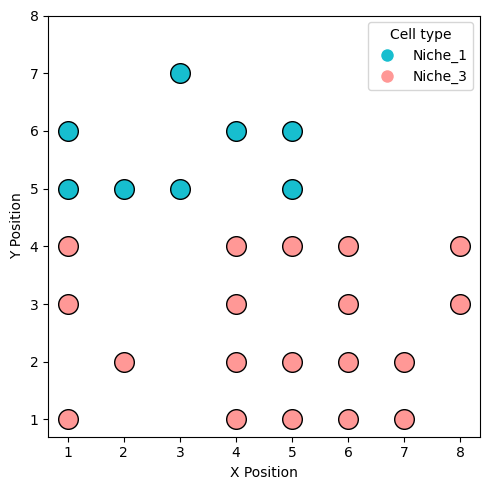

In [8]:
# Extract relevant data
channels = sc_ad_recorded_ephy_cell_comp_W11D1.obs['channels']
niche = sc_ad_recorded_ephy_cell_comp_W11D1.obs['niche']

# Define unique colors for each joint_niche
palette_niche = {'Niche_1': '#17becf', 'Niche_2': '#bcbd22', 'Niche_3': '#ff9896'}

unique_cell_niche = np.unique(niche)

# Define channel to grid mapping
channel_to_grid = {
    'ch0': (2, 0), 'ch1': (1, 0), 'ch2': (0, 0), 'ch3': (3, 0),
    'ch4': (0, 1), 'ch5': (1, 1), 'ch6': (2, 1), 'ch7': (3, 1),
    'ch8': (0, 2), 'ch9': (1, 2), 'ch10': (2, 2), 'ch11': (3, 2),
    'ch12': (0, 3), 'ch13': (1, 3), 'ch14': (2, 3), 'ch15': (3, 3),
    'ch16': (0, 4), 'ch17': (1, 4), 'ch18': (2, 4), 'ch19': (3, 4),
    'ch20': (0, 5), 'ch21': (1, 5), 'ch22': (2, 5), 'ch23': (3, 5),
    'ch24': (0, 6), 'ch25': (1, 6), 'ch26': (2, 6), 'ch27': (3, 6),
    'ch28': (0, 7), 'ch29': (1, 7), 'ch30': (2, 7), 'ch31': (3, 7),
    'ch32': (4, 7), 'ch33': (5, 7), 'ch34': (6, 7), 'ch35': (7, 7),
    'ch36': (4, 6), 'ch37': (5, 6), 'ch38': (6, 6), 'ch39': (7, 6),
    'ch40': (4, 5), 'ch41': (5, 5), 'ch42': (6, 5), 'ch43': (7, 5),
    'ch44': (4, 4), 'ch45': (5, 4), 'ch46': (6, 4), 'ch47': (7, 4),
    'ch48': (4, 3), 'ch49': (5, 3), 'ch50': (6, 3), 'ch51': (7, 3),
    'ch52': (4, 2), 'ch53': (5, 2), 'ch54': (6, 2), 'ch55': (7, 2),
    'ch56': (4, 1), 'ch57': (5, 1), 'ch58': (6, 1), 'ch59': (7, 1),
    'ch60': (4, 0), 'ch61': (7, 0), 'ch62': (6, 0), 'ch63': (5, 0)
}

# Create data grid for heatmap
heatmap = np.zeros((8, 8))  # Assuming 8x8 grid
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        heatmap[grid_pos] += 1  # Increment count for heatmap

# Plot heatmap
fig, ax = plt.subplots(figsize=(5, 5))

# Overlay dots
for i, channel in enumerate(channels):
    if channel in channel_to_grid:
        grid_pos = channel_to_grid[channel]
        cell_niche = niche[i]
        color = palette_niche[cell_niche]
        ax.scatter(grid_pos[1], grid_pos[0], color=color, s=200, edgecolor='black', zorder=2)


# Add grid lines and labels
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(range(1, 9))
ax.set_yticklabels(range(1, 9))
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')

# Create legend for dots
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette_niche[cell], markersize=10, label=cell)
           for cell in unique_cell_niche]
ax.legend(handles=handles, title='Cell type', loc='upper right')

plt.tight_layout()
plt.show()

# Waveforms selected positions

In [9]:
# List of cells of interest
cell_interested = [
    'W11D1_Position034_CM_45', 'W11D1_Position035_CM_39', 'W11D1_Position044_CM_90',
    'W8D2_Position008_CM_166', 'W8D2_Position013_CM_163', 'W8D2_Position017_CM_110',
    'W11D1_Position020_CMEC_10', 'W11D1_Position001_CMEC_66', 'W11D1_Position029_CMEC_30'
]

# Filter the AnnData object
filtered_adata = sc_ad_recorded_ephy_cell_comp[sc_ad_recorded_ephy_cell_comp.obs['Unique_cell_id'].isin(cell_interested)].copy()


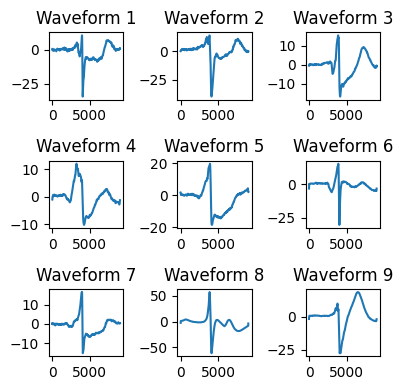

In [10]:
# Extract waveform data from filtered_adata
waveforms = filtered_adata.uns['spks_mean_denoised']

# Ensure waveforms is an array or convert it to one
waveforms = np.array(waveforms)

# Number of subplots (3x3 grid)
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4, 4))

# Loop through each subplot and plot the waveform
for i, ax in enumerate(axes.flat):
    if i < len(waveforms):  # Check if we have enough waveforms
        ax.plot(waveforms[i], label=f"Waveform {i+1}")
        ax.set_title(f"Waveform {i+1}")
        
    else:
        ax.axis('off')  # Turn off unused subplots

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()